# Split Normal Mixture

Figure 2 in the [paper](https://arxiv.org/abs/2007.09670).

In [1]:
import os
import sys

os.chdir('..')
sys.path.append('..')

In [2]:
%config InlineBackend.figure_formats = ['svg']

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from pprint import pprint

import neural_pi.estimator.split_normal as sn
from neural_pi.estimator import snm_aggreg

In [3]:
SEED = 983457

In [4]:
ALPHA = 0.05  # i.e. GAMMA = 0.95 (coverage probability)

# Prediction intervals with point estimates
y_pred = np.array([
    # [y_l, y_u, y_p]
    [-0.55092152, 0.16187938, -0.41047982],
    [-0.40389652, 1.20896118,  0.51259138],
    [-0.00389652, 1.11896118,  0.59149138],
    [-0.75092152, 0.16187938, -0.41047982],
    [-0.44380552, 0.34306728, -0.28312312]
])

In [5]:
# Fitting split normals given prediction intervals with point estimates
split_normal_params = []
for y_l, y_u, y_p in y_pred:
    std_1, std_2 = sn.fit_split_normal(alpha=ALPHA, 
                                       q_l=y_l, q_u=y_u, mode=y_p, 
                                       seed=SEED, verbose=False)
    p_l = sn.cdf(x=y_l, loc=y_p, scale_1=std_1, scale_2=std_2)
    p_u = sn.cdf(x=y_u, loc=y_p, scale_1=std_1, scale_2=std_2)
    split_normal_params.append(dict(
        loc=y_p,
        scale_1=std_1,
        scale_2=std_2
    ))
    np.testing.assert_allclose([p_l, p_u], [ALPHA / 2, 1 - ALPHA / 2], atol=1e-3)
    
pprint(split_normal_params)

/home/tarik/miniconda3/envs/neural-pi/lib/python3.7/site-packages/jax/lib/xla_bridge.py:119: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


[{'loc': -0.41047982,
  'scale_1': DeviceArray(0.08632262, dtype=float32),
  'scale_2': DeviceArray(0.27039117, dtype=float32)},
 {'loc': 0.51259138,
  'scale_1': DeviceArray(0.45971662, dtype=float32),
  'scale_2': DeviceArray(0.3633781, dtype=float32)},
 {'loc': 0.59149138,
  'scale_1': DeviceArray(0.30212635, dtype=float32),
  'scale_2': DeviceArray(0.2708086, dtype=float32)},
 {'loc': -0.41047982,
  'scale_1': DeviceArray(0.18306513, dtype=float32),
  'scale_2': DeviceArray(0.2825256, dtype=float32)},
 {'loc': -0.28312312,
  'scale_1': DeviceArray(0.09798559, dtype=float32),
  'scale_2': DeviceArray(0.29628676, dtype=float32)}]


/home/tarik/miniconda3/envs/neural-pi/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


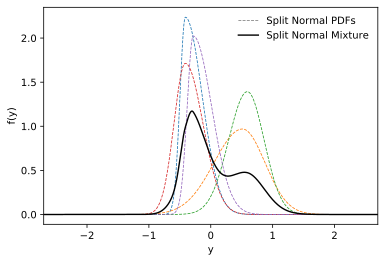

In [6]:
X_START, X_END, PRECISION = -2.7, 2.7, 1e-4

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('y')
ax.set_ylabel('f(y)')
plt.xlim(X_START, X_END)

num_samples = int((X_END - X_START) / PRECISION)
x = np.linspace(X_START, X_END, num_samples)

# Plotting of split normal PDFs
j = 1
mixture_pdf = 0
for params in split_normal_params:
    y = sn.pdf(x, **params)
    mixture_pdf += y
    ax.plot(x, y, 
            lw=1, alpha=1., linestyle='--', linewidth=0.8, 
            label='Split Normal PDFs' if j == 1 else '')
    j += 1

# Plotting of the split normal mixture
ensemble_size = len(y_pred)
mixture_pdf = mixture_pdf / ensemble_size
ax.plot(x, mixture_pdf, 
        lw=1.4, alpha=1., c='black', 
        label='Split Normal Mixture')

legend = ax.legend(loc='upper right', frameon=False)
legend.legendHandles[0].set_color('gray')

plt.show()

In [7]:
should_be_one = np.sum(mixture_pdf * (X_END - X_START) / num_samples)
np.testing.assert_almost_equal(should_be_one, 1., decimal=1e-4)

In [8]:
fig.savefig('split_normal_mixture_2.pdf', format='pdf', dpi=1000, bbox_inches='tight')

In [9]:
fig.savefig('split_normal_mixture_2.svg', format='svg', dpi=1000, bbox_inches='tight')